# Softmax classifier
 - 강의는 들어야한다. 코드만 적어놓음 11-14 08:43

In [13]:
import tensorflow as tf
import numpy as np

## Data setting & making hypothesis

In [14]:
xy = np.loadtxt('05train.txt', unpack=True, dtype='float32')
print("        ","b "," X1 "," X2 ","  y[A , B , C]")
xy.T

         b   X1   X2    y[A , B , C]


array([[ 1.,  2.,  1.,  0.,  0.,  1.],
       [ 1.,  3.,  2.,  0.,  0.,  1.],
       [ 1.,  3.,  4.,  0.,  0.,  1.],
       [ 1.,  5.,  5.,  0.,  1.,  0.],
       [ 1.,  7.,  5.,  0.,  1.,  0.],
       [ 1.,  2.,  5.,  0.,  1.,  0.],
       [ 1.,  6.,  6.,  1.,  0.,  0.],
       [ 1.,  7.,  7.,  1.,  0.,  0.]], dtype=float32)

In [15]:
x_data = np.transpose(xy[0:3])
y_data = np.transpose(xy[3:])

 - column 1 : b값을 해결하기 위한 1로 고정 

In [16]:
x_data

array([[ 1.,  2.,  1.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  4.],
       [ 1.,  5.,  5.],
       [ 1.,  7.,  5.],
       [ 1.,  2.,  5.],
       [ 1.,  6.,  6.],
       [ 1.,  7.,  7.]], dtype=float32)

 - column 3 : Result of data

In [17]:
y_data

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]], dtype=float32)

 - Tensorflow 의 Softmax 함수 사용.
 - X : Row Count 를 알 수 없으므로 None, Columns [b, X1, X2] = 3
 - Y : Row Count 를 알 수 없으므로 None, Columns [A, B, C] = 3

In [18]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.zeros([3, 3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)) # W,X 가 아니라 X,W인 이유는 Transpose를 했기때문에. 

In [19]:
print(X)
print(Y)
print(W)

Tensor("Placeholder_2:0", shape=(?, 3), dtype=float32)
Tensor("Placeholder_3:0", shape=(?, 3), dtype=float32)


In [20]:
hypothesis

<tf.Tensor 'Softmax_1:0' shape=(?, 3) dtype=float32>

## Cost function & Optimizer 
$LOSS = {1 \over N} \sum_{i=1}D(S(WX_i+b),L_i)$
- $learning \ rate=Step$ 

In [21]:
learning_rate = 0.01

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), reduction_indices=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Initialize & Launch

 - X: [[1, 11, 7]] , b의 값을 위해 무조건 1, 몇시간 공부하고, 몇번 왔다 ( 수업에 ) 

In [22]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    cost_list = []
    step_list = []
    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        cost_in_step = sess.run(cost, feed_dict={X:x_data, Y:y_data})
        step_list.append(step)
        cost_list.append(cost_in_step)
        #if step % 200 == 0:
        #   print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7]]})
    print ("a :", a, sess.run(tf.arg_max(a, 1)))

    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4]]})
    print ("b :", b, sess.run(tf.arg_max(b, 1)))

    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0]]})
    print("c :", c, sess.run(tf.arg_max(c, 1)))

a : [[ 0.68849611  0.26731548  0.04418841]] [0]
b : [[ 0.24322301  0.44183129  0.31494567]] [1]
c : [[ 0.02974836  0.082085    0.88816667]] [2]


## Chart the cost reduction in every step.

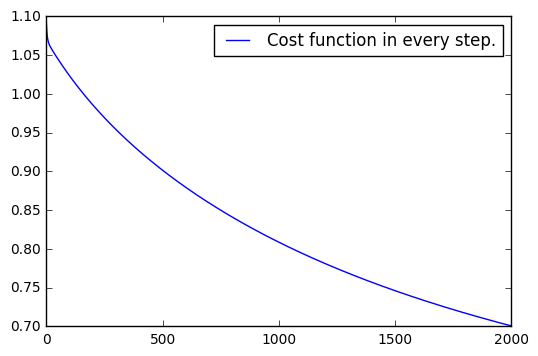

In [23]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(step_list, cost_list, label='Cost function in every step.')
plt.legend()
plt.show()